<a href="https://colab.research.google.com/github/jmoralespineda/TAM_TEORIA_APRENDIZAJE_DE_MAQUINA/blob/main/TAREA/TAREA9_DL_Keras_API_funcional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creación de arquitecturas de aprendizaje profundo mediante API funcional de Keras.

- Se presentan los consideraciones básicas respecto a la [API funcional de Keras](https://keras.io/guides/functional_api/) para la implementación de modelos de redes profundas con TensorFlow.



In [2]:
import tensorflow as tf #importar tensorflow
print(tf.__version__)

2.19.0


- Se utilizará la base de datos Fashion Mnist nuevamente, normalizando las imágenes de 0 a 1.

In [3]:
train, test = tf.keras.datasets.fashion_mnist.load_data()
images, labels = train

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


- Se presenta un ejemplo de la base de datos

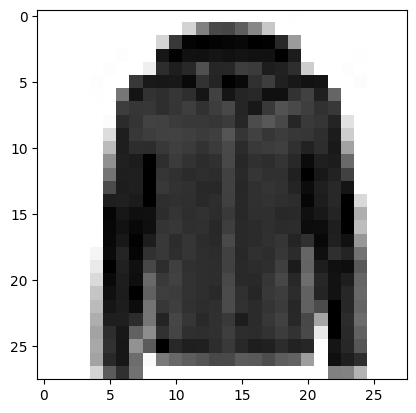

In [4]:
import matplotlib.pyplot as plt
plt.imshow(images[5000,:,:],cmap= 'binary')
plt.show()

In [5]:
import numpy as np
print(np.unique(labels)) #etiquetas
print(images.shape) #tamaño de las imágenes

[0 1 2 3 4 5 6 7 8 9]
(60000, 28, 28)


In [6]:
Xtrain, ytrain = train
Xtrain = Xtrain/255 # tipo flotante, normalizados de 0 a 1
Xtest, ytest = test
Xtest = Xtest/255 # tipo flotante, normalizados de 0 a 1

- En el cuaderno introductorio a redes neuronales con tensorflow se planteó la construcción de modelos mediante secuencia de capas:

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ red1 (Dense)                    │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hred2 (Dense)                   │ (None, 50)             │        10,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,560 (654.53 KB)

 Trainable params: 167,560 (654.53 KB)

 Non-trainable params: 0 (0.00 B)

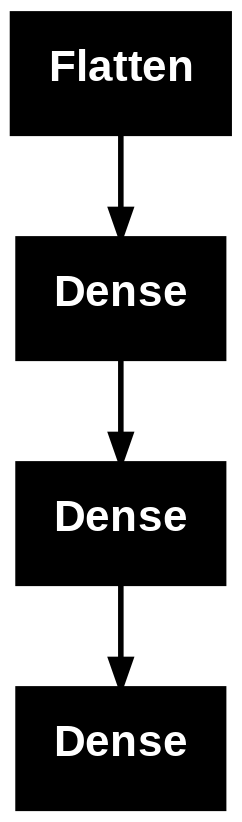

In [7]:
#definir arquitectura secuencial
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2])),
    tf.keras.layers.Dense(200,activation="relu", name='red1'),
    tf.keras.layers.Dense(50, activation="tanh",name='hred2'),
    tf.keras.layers.Dense(10,activation='softmax',name='output')
])

model.summary() # resumen del modelo
tf.keras.utils.plot_model(model) #diagrama del modelo

- Aunque la implementacióm mediante secuencia es intuitiva, no permite realizar conexiones flexibles entre capas.

- En ese sentido, Keras permite crear capas bajo el principio de funciones y argumentos, como se muestra a continuación.

**Nota**: a diferencia de la estructura secuencial, en la API funcional se debe indicar la capa o capas de entrada y la capa o capas de salida para crear el grafo computacional de forma apropiada.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ entrada (InputLayer)            │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ h1 (Dense)                      │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ h2 (Dense)                      │ (None, 50)             │        10,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,560 (654.53 KB)

 Trainable params: 167,560 (654.53 KB)

 Non-trainable params: 0 (0.00 B)

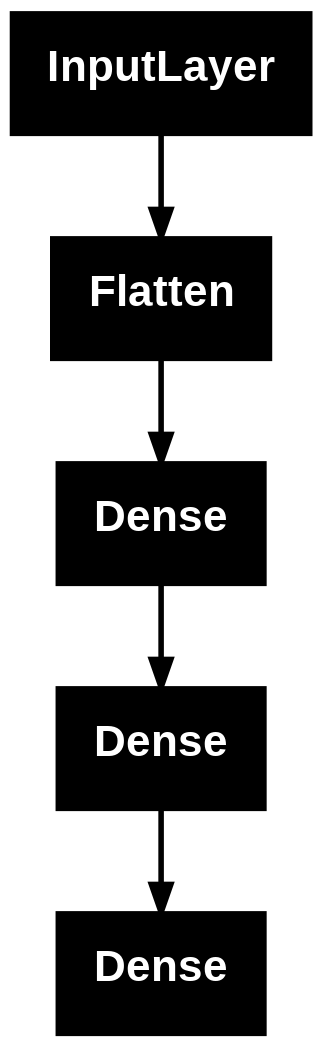

In [8]:
#arquitectura funcional
#capa de entrada
input_l = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada')
#capa de aplanamiento de las imágenes
flatten = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_l)#argumento de entrada
#capas densas
h1 = tf.keras.layers.Dense(200,activation='tanh',name='h1')(flatten)#argumento de entrada
h2 = tf.keras.layers.Dense(50,activation='tanh',name='h2')(h1)
#capa de salida
output = tf.keras.layers.Dense(10,activation="softmax",name='output')(h2)
#crear modelo según conexiones tipo funcionales
model_fun = tf.keras.Model(inputs=input_l,outputs=output)

#resumen y gráfica del modelo
model_fun.summary()
tf.keras.utils.plot_model(model_fun)


# La API funcional permite realizar conexiones más flexibles

- En el siguiente ejemplo se crea un modelo con una entrada y dos salidas con interconexiones flexibles:

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


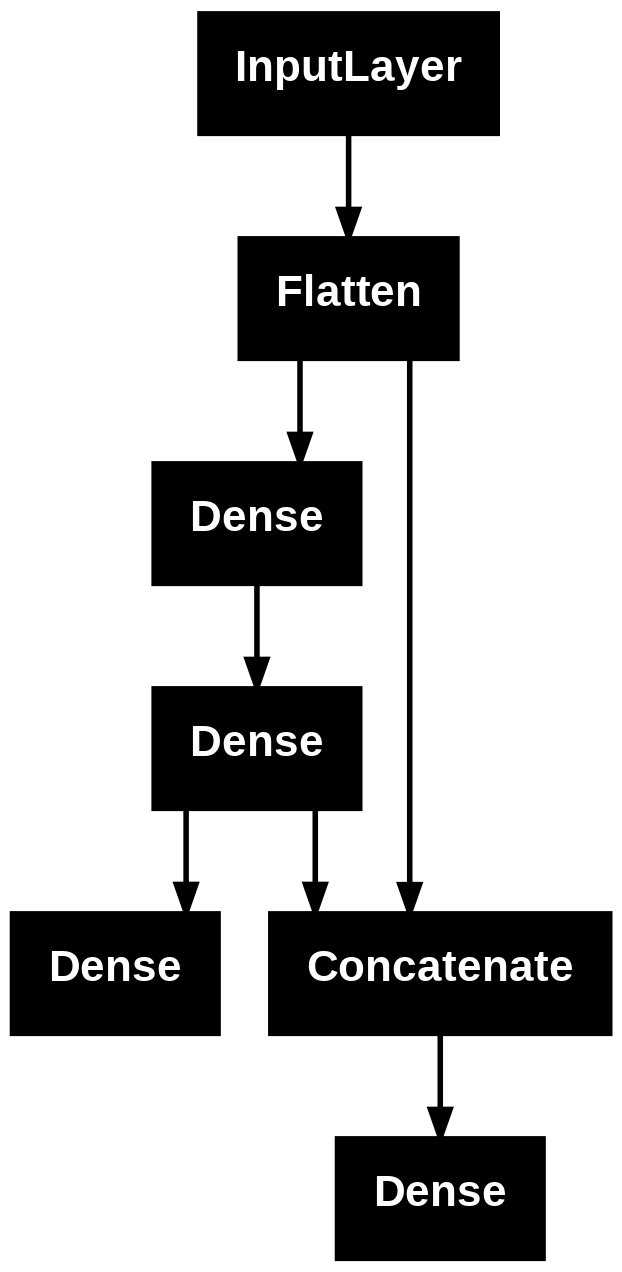

In [9]:
#arquitectura funcional 2
tf.keras.backend.clear_session()
input_l = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada')
flatten = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_l)

h1 = tf.keras.layers.Dense(200,activation='tanh',name='h1')(flatten)
h2 = tf.keras.layers.Dense(50,activation='tanh',name='h2')(h1)
#capa que concatena caracterísitacas extraídas en h2 con imágenes de entrada
concat = tf.keras.layers.concatenate([h2,flatten])
#se crean dos salidas:
output_A = tf.keras.layers.Dense(10,activation="softmax",name='outputA')(concat)#desde concatenación
output_B = tf.keras.layers.Dense(10,activation="softmax",name='outputB')(h2)#desde h2
#las entradas y salidas se ingresan como listas
model_fun = tf.keras.Model(inputs=input_l,outputs=[output_A, output_B])
#model_fun.summary()
tf.keras.utils.plot_model(model_fun)

**Nota**: si se cuenta con varias salidas se puede definir un mismo costo para cada salida, o una lista con los costos requeridos. Además, en la lista `loss_weights` se puede especificar el valor del peso asociado al costo de cada salida en el intervalo [0,1].

In [10]:
model_fun.compile(loss="sparse_categorical_crossentropy", #custom_loss(),#custom_loss(),#"sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy","accuracy"]) #f1, precision, recall, crossentropy


- El entrenamiento se realiza de igual forma al utilizado con el modelo secuencial.

- Como se fijaron dos salidas, se debe ingresar una lista para los argumentos ytrain.

In [11]:
history = model_fun.fit(Xtrain, [ytrain,ytrain] , epochs=10,batch_size=64, # 32, 64, 128, 256
                    validation_split=0.3) # se fija el conjunto de validación como el 20% del de train

Epoch 1/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 1.5047 - outputA_accuracy: 0.7282 - outputA_loss: 0.8108 - outputB_accuracy: 0.7611 - outputB_loss: 0.6939 - val_loss: 0.8379 - val_outputA_accuracy: 0.8494 - val_outputA_loss: 0.4187 - val_outputB_accuracy: 0.8461 - val_outputB_loss: 0.4184
Epoch 2/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.7873 - outputA_accuracy: 0.8560 - outputA_loss: 0.4006 - outputB_accuracy: 0.8610 - outputB_loss: 0.3867 - val_loss: 0.7859 - val_outputA_accuracy: 0.8594 - val_outputA_loss: 0.3965 - val_outputB_accuracy: 0.8598 - val_outputB_loss: 0.3883
Epoch 3/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.7010 - outputA_accuracy: 0.8719 - outputA_loss: 0.3552 - outputB_accuracy: 0.8754 - outputB_loss: 0.3458 - val_loss: 0.7361 - val_outputA_accuracy: 0.8628 - val_outputA_loss: 0.3705 - val_outputB_accuracy: 0.8663 - val_outputB_loss: 0.3645
Epoch 4/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.6522 - outputA_accuracy: 0.8784 

- Se presentan las curvas de desempeño:

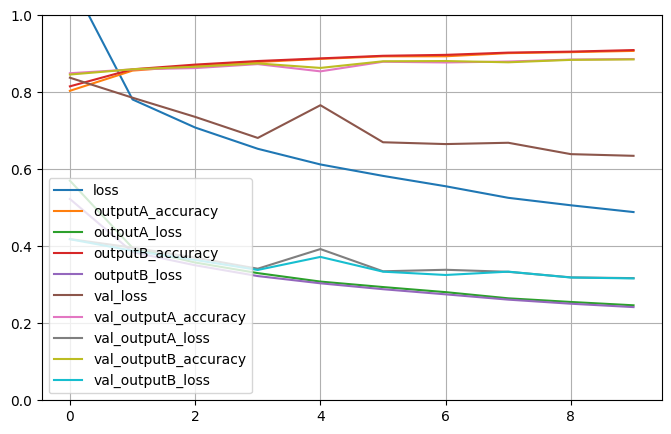

In [12]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.show()

- Como el modelo generado presenta dos salidas, el rendimiento se discrimina por cada salida y el acumulado.

- A la hora de predecir la salida para una nueva muestra, se debe tener en cuenta la cantidad de salidas fijadas.

In [13]:
yestA,yestB = model_fun.predict(Xtest)
print(yestA.shape,yestB.shape)#salidas tipo 1 -K probabilidad de membresia a cada clase

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(10000, 10) (10000, 10)


In [14]:
print(yestA[0].argmax(),ytest[0])#para estimar la etiqueta ordinal se encuentra el max por columnas

9 9


In [15]:
scoreA = model_fun.evaluate(Xtest,[ytest,ytest])#evaluacion
print(scoreA)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6883 - outputA_accuracy: 0.8778 - outputA_loss: 0.3446 - outputB_accuracy: 0.8738 - outputB_loss: 0.3437
[0.6847296953201294, 0.34197741746902466, 0.34212353825569153, 0.8795999884605408, 0.8759999871253967]


# Grafiquemos los pesos respecto a las dimensiones de la imagen original

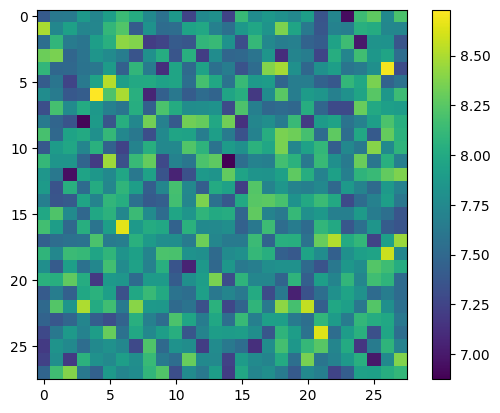

In [16]:
#se busca identificar las entradas más relevantes para la red
plt.imshow(abs(model.layers[1].get_weights()[0]).sum(axis=1).reshape(28,28))
plt.colorbar()
plt.show()

In [17]:
model.layers[1].get_weights()[1].shape # accediendo a los bias

(200,)

# Salidas parciales de la red

- La estrategia funcional nos permite acceder a partes intermedias de la red para encontrar mapas de características y verificar el aprendizaje de la representación.

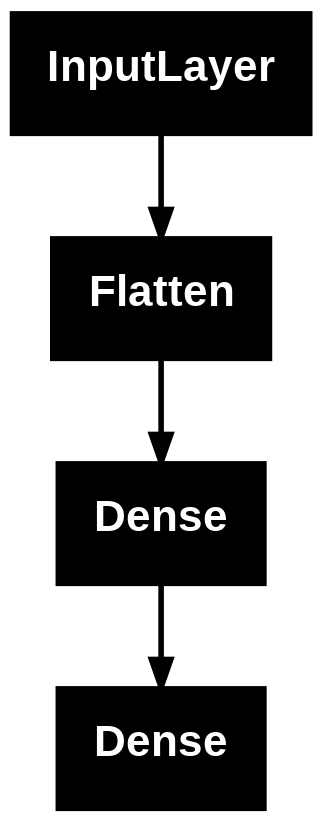

In [18]:
#crear nuevo modelo con salida parcial
model_B = tf.keras.Model(inputs=model_fun.inputs,outputs=model_fun.get_layer('h2').output) #se accede a capas por nombre
tf.keras.utils.plot_model(model_B) # modelo ya esta ajustado!


In [19]:
z = model_B.predict(Xtest) # salida en h2
z.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


(10000, 50)

### Dado que se fijaron 50 unidades, se pueden utilizar técnicas de reducción de dimensión para visualizar los patrones intermedios de la red en 2D.


# Principal Component Analysis (PCA)

Reducción de dimensión lineal basado en la preservación de la varianza

![PCA1](https://www.soloentendidos.com/wp-content/uploads/2021/06/Principal-Component-Analysis-second-principal_thumb-1.gif)


![PCA2](https://1.bp.blogspot.com/-pgMAHiIWvuw/Tql5HIXNdRI/AAAAAAAABLI/I2zPF5cLRwQ/s1600/clust.gif)


# t-student distributed Stochastic Neighbor Embedding (t-SNE)

Reducción de dimensión basado en la preservación de localidades (vecinos) utilizando medidas de información desde estimación no paramétrica de probabilidad en el espación de alta y baja dimensión, respectivamente.

![tsne](https://learnopencv.com/wp-content/uploads/2022/11/tsne.gif)

![tsne2](https://3.bp.blogspot.com/-NE01azL_JxU/Wxli17oYNzI/AAAAAAAACxQ/axOI2yy-Ft0QbqaekOyemm5Xn0wAFvRUwCLcBGAs/s640/image2.gif)

In [20]:
from sklearn.decomposition import PCA
zpca = PCA(n_components=2).fit_transform(z)
zpca.shape

(10000, 2)

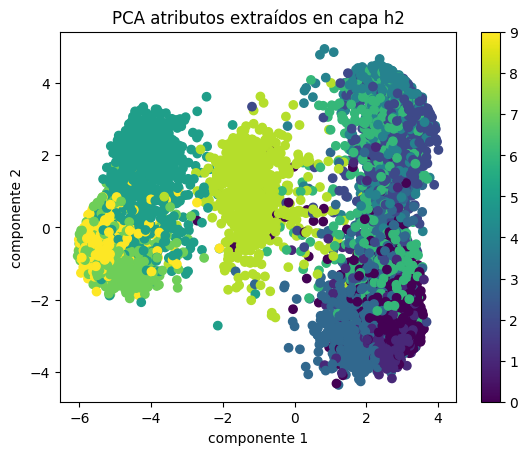

In [21]:
plt.scatter(zpca[:,0],zpca[:,1],c=ytest)
plt.colorbar()
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('PCA atributos extraídos en capa h2')
plt.show()

In [22]:
#plot mnist 2D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
def plot_mnist_2d(Z,y,images,img_w=28,img_h=28,zoom=0.5,cmap='jet'):
    fig, ax = plt.subplots(figsize=(16,10))
    for i in range(Z.shape[0]):
        #print('img',i+1,'/',Z.shape[0])
        image = images[i].reshape((img_w, img_h))
        im = OffsetImage(image, zoom=zoom,cmap=cmap)
        ab = AnnotationBbox(im, (Z[i,0], Z[i,1]), xycoords='data', frameon=False)
        ax.add_artist(ab)
        ax.update_datalim([(Z[i,0], Z[i,1])])
        ax.autoscale()

- También, podemos revisar la distribución de las imágenes en el espacio proyectado:

Text(0.5, 1.0, 'PCA atributos extraídos en capa h2')

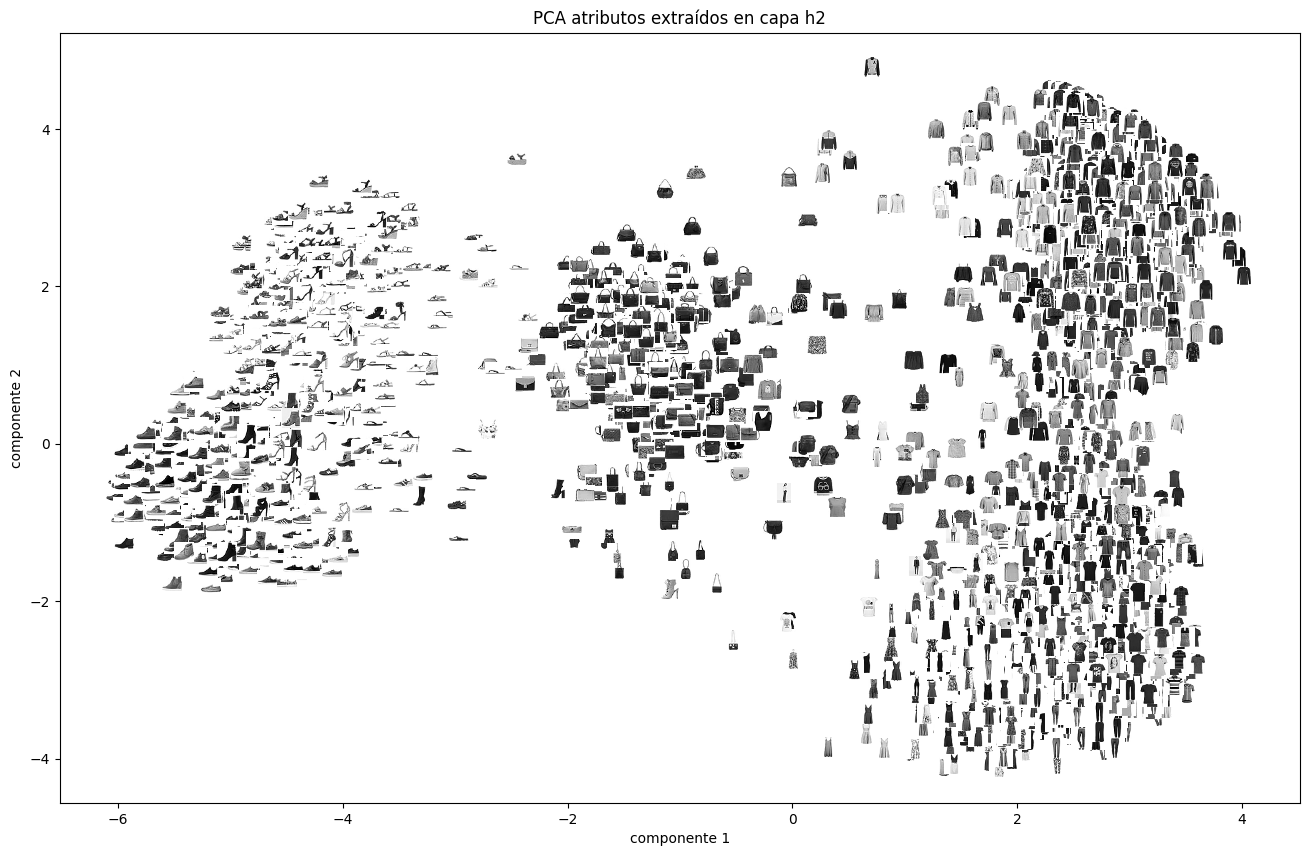

In [23]:
Ni =4000 # graficar Ni muestras como imagenes en espacio 2D
ind = np.random.randint(0,ytest.shape[0],Ni)
plot_mnist_2d(zpca[ind],ytest[ind],Xtest[ind],img_w=28,img_h=28,zoom=0.5,cmap='binary')
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('PCA atributos extraídos en capa h2')

# Ejercicio:

- Grafique el espacio proyectado de PCA en 2D (etiquetas e imágenes) para los atributos aprendidos por la capa de concatenación.

- Repita el proceso aplicando la técnica de reducción de dimensión [UMAP de RAPIDS](https://developer.nvidia.com/blog/even-faster-and-more-scalable-umap-on-the-gpu-with-rapids-cuml/).

- Plantee una nueva arquitectura tipo funcional utilizando capas convolucionales (Ver cuaderno [CNNs](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/5_DeepLearning/3_Introduccion_CNN.ipynb)) para el entrenamiento de la base de datos Mnist-digitos, utilizando tres entradas: i) imágenes limpias, ii) y iii) imágenes con ruido blanco Gaussiano ante diferentes varianzas, y dos salidas i) estimación del digito, ii) estimación número par número impar.

In [26]:
#Ayuda de código:
#cargar fashion mnist o mnist
#(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train, X_valid = X_train[:-55000], X_train[-55000:]
y_train, y_valid = y_train[:-55000], y_train[-55000:]

X_train = X_train[..., np.newaxis]/255.
X_valid = X_valid[..., np.newaxis]/255.
X_test = X_test[..., np.newaxis]/255.
print(X_train.shape,X_valid.shape,X_test.shape)

(5000, 28, 28, 1) (55000, 28, 28, 1) (10000, 28, 28, 1)


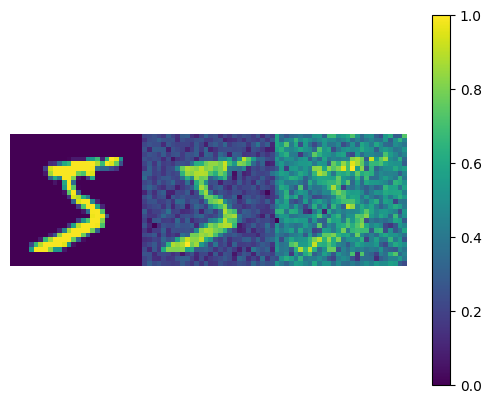

In [27]:
#crear entradas con y sin ruido
from sklearn.preprocessing import MinMaxScaler

var_ = [0.01,0.25]
inputs_train = [X_train]
inputs_valid = [X_valid]
inputs_test = [X_test]

#recorrer varianzas
for var_i in var_:
    dim = X_train.shape
    #definir ruido
    tmp = X_train + (np.sqrt(var_i)*np.random.randn(X_train.shape[0],dim[1],dim[2],dim[3]))
    tmp = MinMaxScaler().fit_transform(tmp.reshape(dim[0],-1).T).T #fijar señal con ruido de 0 a 1
    inputs_train += [tmp.reshape(dim)]

    dim = X_valid.shape
    tmp = X_valid + (np.sqrt(var_i)*np.random.randn(X_valid.shape[0],dim[1],dim[2],dim[3]))
    tmp = MinMaxScaler().fit_transform(tmp.reshape(dim[0],-1).T).T
    inputs_valid += [tmp.reshape(dim)]

    dim = X_test.shape
    tmp = X_test + (np.sqrt(var_i)*np.random.randn(X_test.shape[0],dim[1],dim[2],dim[3]))
    tmp = MinMaxScaler().fit_transform(tmp.reshape(dim[0],-1).T).T
    inputs_test += [tmp.reshape(dim)]


plt.imshow(np.c_[inputs_train[0][0,:,:,0],inputs_train[1][0,:,:,0],inputs_train[2][0,:,:,0]])
plt.axis('off')
plt.colorbar()
plt.show()

In [28]:
#veector de salida par o impar
ytrain_B = (y_train % 2)
print(ytrain_B[10:])
print(y_train[10:])

[1 1 1 ... 0 1 0]
[3 5 3 ... 2 1 2]


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


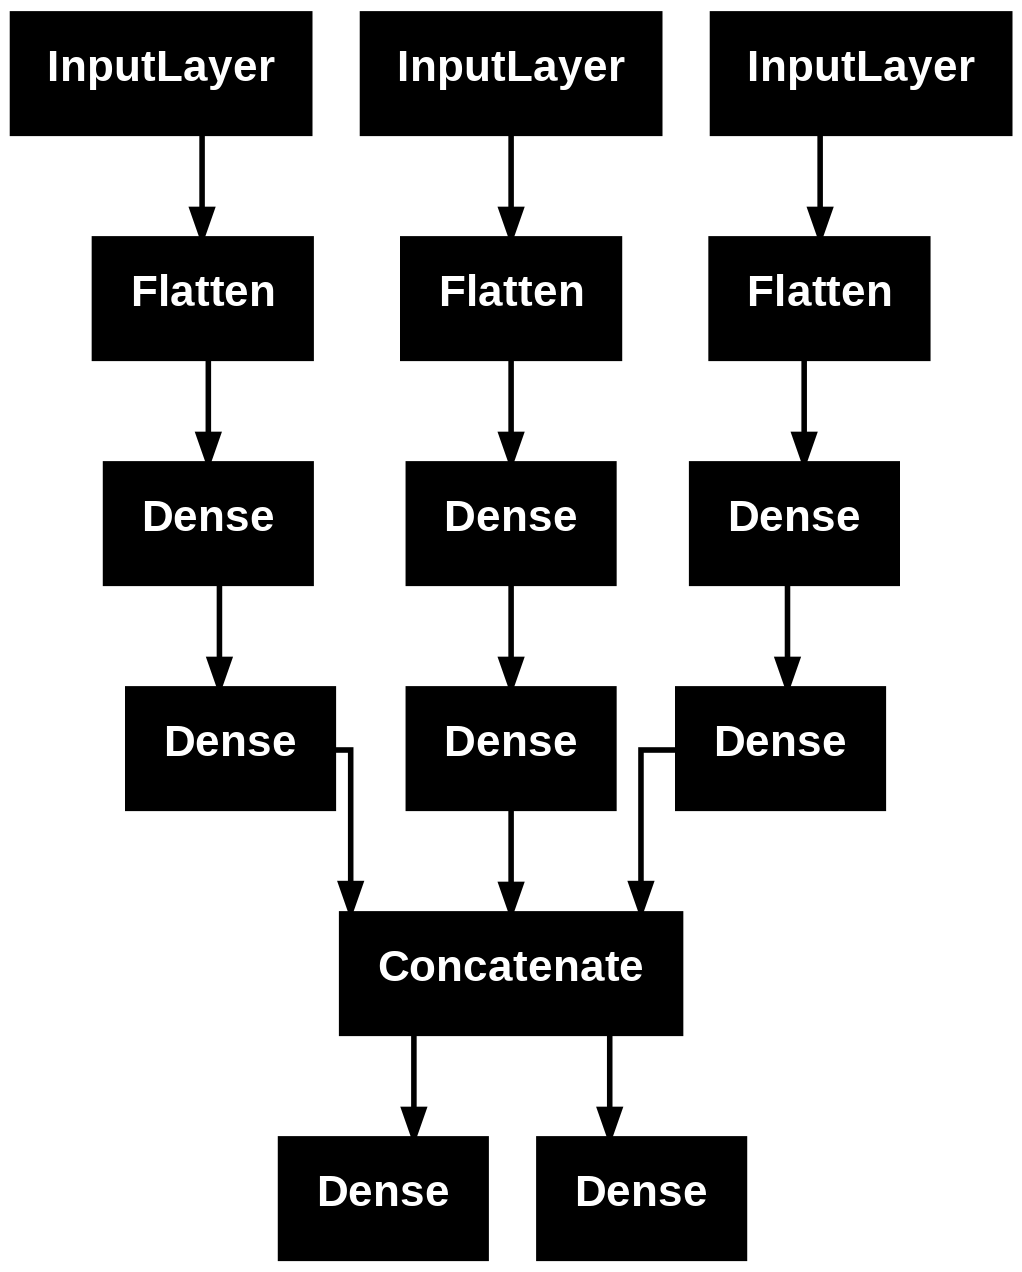

In [29]:
#arquitectura funcional 2 - Ayuda de código con capas densas - cambiar a capas cnn
tf.keras.backend.clear_session()
input_1 = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada_1')
input_2 = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada_2')
input_3 = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada_3')

flatten_1 = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_1)
flatten_2 = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_2)
flatten_3 = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_3)

h1_1 = tf.keras.layers.Dense(200,activation='tanh',name='h1_1')(flatten_1)
h2_1 = tf.keras.layers.Dense(50,activation='tanh',name='h2_1')(h1_1)

h1_2 = tf.keras.layers.Dense(200,activation='tanh',name='h1_2')(flatten_2)
h2_2 = tf.keras.layers.Dense(50,activation='tanh',name='h2_2')(h1_2)

h1_3 = tf.keras.layers.Dense(200,activation='tanh',name='h1_3')(flatten_3)
h2_3 = tf.keras.layers.Dense(50,activation='tanh',name='h2_3')(h1_3)

#capa que concatena caracterísitacas extraídas en h2 con imágenes de entrada
concat = tf.keras.layers.concatenate([h2_1,h2_2,h2_3])
#se crean dos salidas:
output_d = tf.keras.layers.Dense(10,activation="softmax",name='output_d')(concat)#desde concatenación
output_p = tf.keras.layers.Dense(1,activation="sigmoid",name='output_p')(concat)#desde h2
#las entradas y salidas se ingresan como listas
model_fun2 = tf.keras.Model(inputs=[input_1,input_2,input_3],outputs=[output_d, output_p])
#model_fun.summary()
tf.keras.utils.plot_model(model_fun2)

In [30]:
#Entrenar y ajustar el modelo, revisar rendimientos en cada salida

#1. Grafique el espacio proyectado de PCA en 2D (etiquetas e imágenes) para los atributos aprendidos por la capa de concatenación.

**Explicación detallada**

**Capa de concatenación**

Es el punto donde el modelo fusiona las tres entradas (imagen limpia y dos versiones con ruido). Esta capa representa un espacio latente multimodal, que combina información redundante y robusta a ruido.

**Modelo extractor**

Model(inputs, outputs) de Keras permite definir un modelo nuevo que termina en una capa intermedia, sin reentrenar la red, ideal para inspeccionar las representaciones aprendidas.

**PCA (Análisis de Componentes Principales)**

Se utiliza para reducir la dimensionalidad a dos ejes que capturen la mayor varianza posible del espacio latente. Esto permite graficar las relaciones entre muestras.

**Visualizaciones**

Primer gráfico: coloreado por dígito (0–9) → muestra agrupamiento por clases.

Segundo gráfico: coloreado por categoría par/impar → las clases pares forman regiones diferenciadas de las impares si la red ha aprendido correctamente esa relación.

(5000, 28, 28, 1) (55000, 28, 28, 1) (10000, 28, 28, 1)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_clean         │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_noise1        │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_noise2        │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 26, 26,    │        320 │ input_clean[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 26, 26,    │        320 │ input_noise1[0][… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 26, 26,    │        320 │ input_noise2[0][… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 13, 13,    │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 13, 13,    │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 13, 13,    │          0 │ conv2d_4[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 11, 11,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 11, 11,    │     18,496 │ max_pooling2d_2[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 11, 11,    │     18,496 │ max_pooling2d_4[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 5, 5, 64)  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 5, 5, 64)  │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 5, 5, 64)  │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 1600)      │          0 │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 1600)      │          0 │ max_pooling2d_3[… │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 672,395 (2.56 MB)

 Trainable params: 672,395 (2.56 MB)

 Non-trainable params: 0 (0.00 B)

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
Varianza explicada total por las 2 componentes: 24.40%


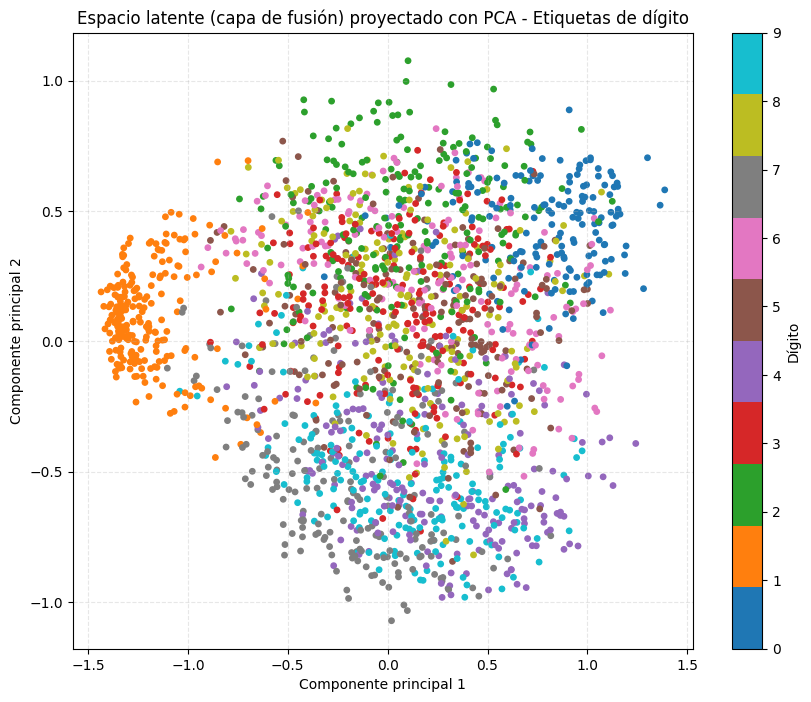

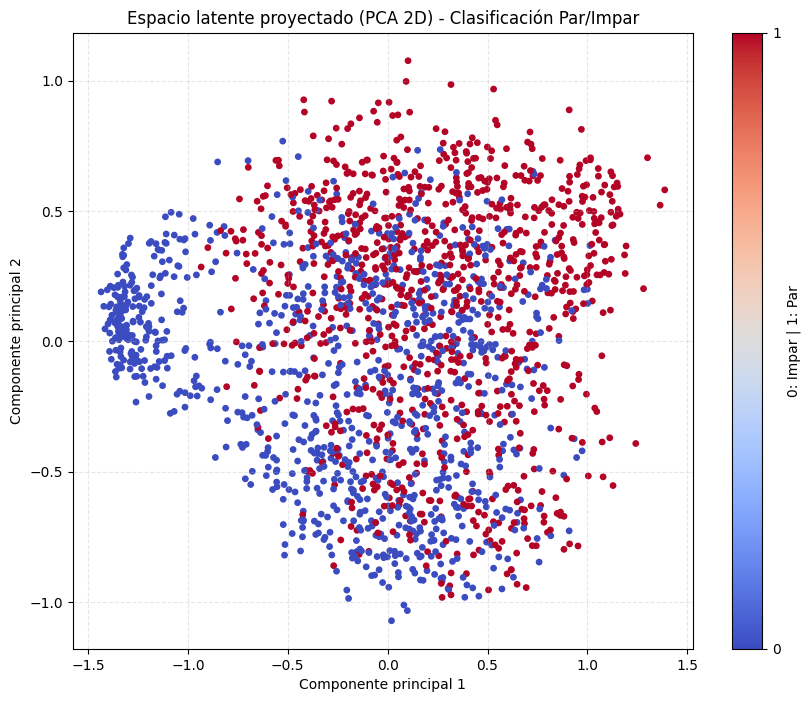

In [42]:
# Arquitectura funcional con capas convolucionales
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras.models import Model
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D,
                                     BatchNormalization, Dropout,
                                     GlobalAveragePooling2D, Dense,
                                     concatenate)


tf.keras.backend.clear_session()

# Load and preprocess MNIST data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train, X_valid = X_train[:-55000], X_train[-55000:]
y_train, y_valid = y_train[:-55000], y_train[-55000:]

X_train = X_train[..., np.newaxis]/255.
X_valid = X_valid[..., np.newaxis]/255.
X_test = X_test[..., np.newaxis]/255.
print(X_train.shape,X_valid.shape,X_test.shape)

# Create inputs with and without noise
var_ = [0.01,0.25]
inputs_train = [X_train]
inputs_valid = [X_valid]
inputs_test = [X_test]

#recorrer varianzas
for var_i in var_:
    dim = X_train.shape
    #definir ruido
    tmp = X_train + (np.sqrt(var_i)*np.random.randn(X_train.shape[0],dim[1],dim[2],dim[3]))
    tmp = MinMaxScaler().fit_transform(tmp.reshape(dim[0],-1).T).T #fijar señal con ruido de 0 a 1
    inputs_train += [tmp.reshape(dim)]

    dim = X_valid.shape
    tmp = X_valid + (np.sqrt(var_i)*np.random.randn(X_valid.shape[0],dim[1],dim[2],dim[3]))
    tmp = MinMaxScaler().fit_transform(tmp.reshape(dim[0],-1).T).T
    inputs_valid += [tmp.reshape(dim)]

    dim = X_test.shape
    tmp = X_test + (np.sqrt(var_i)*np.random.randn(X_test.shape[0],dim[1],dim[2],dim[3]))
    tmp = MinMaxScaler().fit_transform(tmp.reshape(dim[0],-1).T).T
    inputs_test += [tmp.reshape(dim)]

# Define input layers for clean and noisy images
input_clean = tf.keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]), name='input_clean')
input_noise1 = tf.keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]), name='input_noise1')
input_noise2 = tf.keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]), name='input_noise2')

# Convolutional branch for clean images
conv1_clean = tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu')(input_clean)
maxpool1_clean = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1_clean)
conv2_clean = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu')(maxpool1_clean)
maxpool2_clean = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2_clean)
flatten_clean = tf.keras.layers.Flatten()(maxpool2_clean)

# Convolutional branch for noisy images with variance 0.01
conv1_noise1 = tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu')(input_noise1)
maxpool1_noise1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1_noise1)
conv2_noise1 = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu')(maxpool1_noise1)
maxpool2_noise1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2_noise1)
flatten_noise1 = tf.keras.layers.Flatten()(maxpool2_noise1)

# Convolutional branch for noisy images with variance 0.25
conv1_noise2 = tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu')(input_noise2)
maxpool1_noise2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1_noise2)
conv2_noise2 = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu')(maxpool1_noise2)
maxpool2_noise2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2_noise2)
flatten_noise2 = tf.keras.layers.Flatten()(maxpool2_noise2)


# Concatenate the flattened outputs from all branches
concat = tf.keras.layers.concatenate([flatten_clean, flatten_noise1, flatten_noise2], name='fusion_caracteristicas')

# Dense layers for the combined features
dense1 = tf.keras.layers.Dense(128, activation='relu')(concat)
dropout = tf.keras.layers.Dropout(0.5)(dense1) # Added dropout for regularization

# Output layers
output_digit = tf.keras.layers.Dense(10, activation='softmax', name='output_digit')(dropout) # Output for digit estimation (0-9)
output_parity = tf.keras.layers.Dense(1, activation='sigmoid', name='output_parity')(dropout) # Output for parity estimation (even/odd)


# Create the functional model
model_cnn = tf.keras.Model(inputs=[input_clean, input_noise1, input_noise2], outputs=[output_digit, output_parity])

# Display the model summary and plot the model architecture
model_cnn.summary()
tf.keras.utils.plot_model(model_cnn, show_shapes=True)


# ---------------------------------------------------------------
# Análisis PCA del espacio latente de la capa de concatenación
# ---------------------------------------------------------------

# Creamos un nuevo modelo que termina en la capa de concatenación
extractor = Model(inputs=model_cnn.inputs,
                  outputs=model_cnn.get_layer("fusion_caracteristicas").output)

# Obtenemos las representaciones para un subconjunto del conjunto de test
# (por ejemplo, los primeros 2000 ejemplos para make más eficiente el PCA)
# Need to format the test data as a list of inputs
X_test_subset = [inputs_test[0][:2000], inputs_test[1][:2000], inputs_test[2][:2000]]
latent_features = extractor.predict(X_test_subset)
y_test_subset = y_test[:2000]

# ---------------------------------------------------------------
# 2️⃣ Aplicar PCA para reducir a 2 dimensiones
# ---------------------------------------------------------------
pca = PCA(n_components=2)
latent_2d = pca.fit_transform(latent_features)

print(f"Varianza explicada total por las 2 componentes: {np.sum(pca.explained_variance_ratio_):.2%}")

# ---------------------------------------------------------------
# 3️⃣ Visualización del espacio proyectado por etiquetas de dígito
# ---------------------------------------------------------------
plt.figure(figsize=(10, 8))
scatter = plt.scatter(latent_2d[:, 0], latent_2d[:, 1], c=y_test_subset, cmap='tab10', s=15)
plt.colorbar(scatter, ticks=range(10), label='Dígito')
plt.title("Espacio latente (capa de fusión) proyectado con PCA - Etiquetas de dígito")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

# ---------------------------------------------------------------
# 4️⃣ Visualización del espacio proyectado con etiquetas par/impar
# ---------------------------------------------------------------
y_par_impar = (y_test_subset % 2 == 0).astype(int)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(latent_2d[:, 0], latent_2d[:, 1], c=y_par_impar, cmap='coolwarm', s=15)
plt.colorbar(scatter, ticks=[0, 1], label='0: Impar | 1: Par')
plt.title("Espacio latente proyectado (PCA 2D) - Clasificación Par/Impar")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

#2. Repita el proceso aplicando la técnica de reducción de dimensión UMAP de RAPIDS.

**Explicación paso a paso**

**UMAP (RAPIDS cuML)**

UMAP aprende una estructura no lineal del espacio de alta dimensión, preservando relaciones locales entre muestras. Es más potente que PCA cuando el espacio latente tiene relaciones no lineales o clusters complejos.

n_neighbors controla cuántos vecinos se usan para definir la estructura local (típicamente entre 10 y 30).

min_dist ajusta cuán compactos son los grupos en la proyección (menores valores → clusters más apretados).

**RAPIDS cuML vs scikit-learn**

La versión RAPIDS usa CUDA/cuML y opera directamente sobre GPU arrays (cupy), acelerando drásticamente el cálculo en grandes conjuntos de datos.

**Comparación PCA vs UMAP**
| Método | Tipo de reducción | Ventaja principal                                                 | Desventaja                      |
| ------ | ----------------- | ----------------------------------------------------------------- | ------------------------------- |
| PCA    | Lineal            | Muy rápido, interpretabilidad directa                             | No capta relaciones no lineales |
| UMAP   | No lineal         | Mantiene mejor las relaciones locales y la estructura de clusters | Requiere más parámetros y GPU   |


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
[2025-10-31 01:42:27.037] [CUML] [info] build_algo set to brute_force_knn because random_state is given


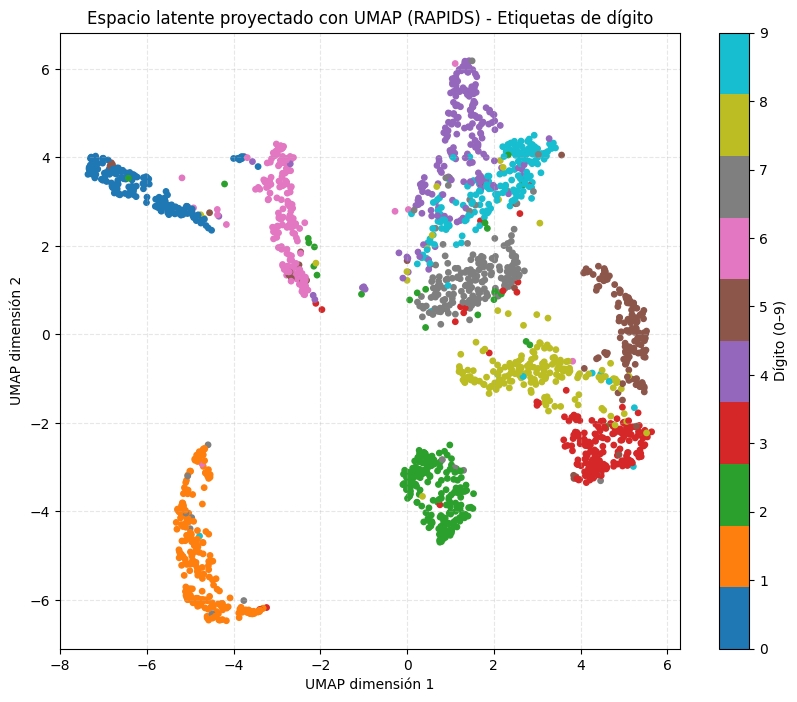

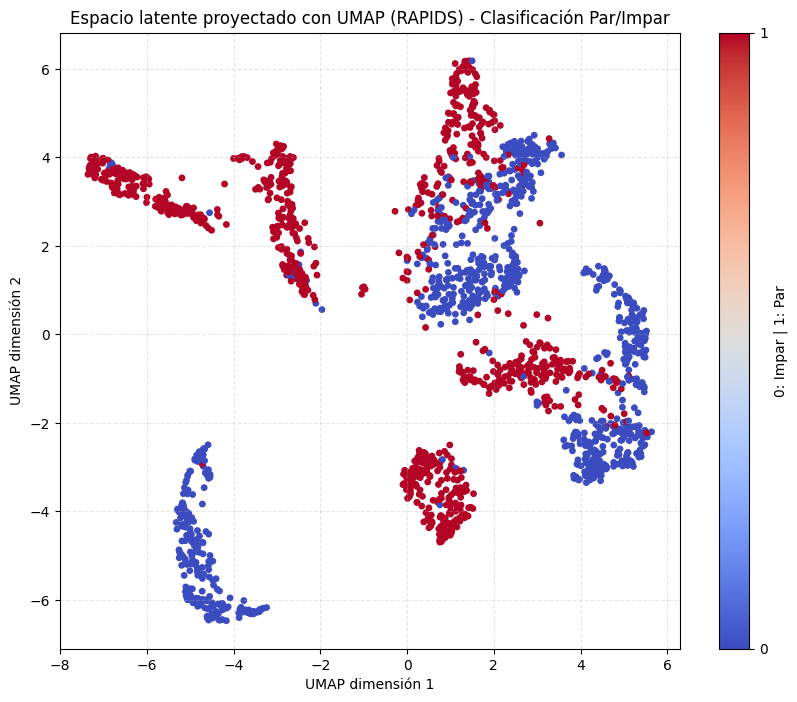

In [44]:
# ===============================================================
# Proyección 2D del espacio latente mediante UMAP (RAPIDS cuML)
# ===============================================================

from cuml.manifold import UMAP
import cupy as cp
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model # Import Model

# ---------------------------------------------------------------
# 1️⃣ Extracción del espacio latente desde la capa de concatenación
# ---------------------------------------------------------------
# Creamos un nuevo modelo que termina en la capa de concatenación
extractor = Model(inputs=model_cnn.inputs,
                  outputs=model_cnn.get_layer("fusion_caracteristicas").output)

# Subconjunto de datos para visualización (ej. primeros 2000)
# Need to format the test data as a list of inputs
X_test_subset = [inputs_test[0][:2000], inputs_test[1][:2000], inputs_test[2][:2000]]
latent_features = extractor.predict(X_test_subset)
y_digits_subset = y_test[:2000]

# ---------------------------------------------------------------
# 2️⃣ Aplicar UMAP con RAPIDS cuML
# ---------------------------------------------------------------
# Convertimos los datos a cupy (structure compatible with GPU)
latent_gpu = cp.asarray(latent_features)

umap_model = UMAP(
    n_components=2,
    n_neighbors=15,
    min_dist=0.1,
    metric='euclidean',
    random_state=42
)

latent_2d_umap = umap_model.fit_transform(latent_gpu)

# Convertimos de vuelta a numpy para graficar con matplotlib
latent_2d_umap = cp.asnumpy(latent_2d_umap)

# ---------------------------------------------------------------
# 3️⃣ Visualización UMAP con etiquetas de dígito
# ---------------------------------------------------------------
plt.figure(figsize=(10, 8))
scatter = plt.scatter(latent_2d_umap[:, 0], latent_2d_umap[:, 1],
                      c=y_digits_subset, cmap='tab10', s=15)
plt.colorbar(scatter, ticks=range(10), label='Dígito (0–9)')
plt.title("Espacio latente proyectado con UMAP (RAPIDS) - Etiquetas de dígito")
plt.xlabel("UMAP dimensión 1")
plt.ylabel("UMAP dimensión 2")
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

# ---------------------------------------------------------------
# 4️⃣ Visualización UMAP con etiquetas Par / Impar
# ---------------------------------------------------------------
y_par_impar = (y_digits_subset % 2 == 0).astype(int)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(latent_2d_umap[:, 0], latent_2d_umap[:, 1],
                      c=y_par_impar, cmap='coolwarm', s=15)
plt.colorbar(scatter, ticks=[0, 1], label='0: Impar | 1: Par')
plt.title("Espacio latente proyectado con UMAP (RAPIDS) - Clasificación Par/Impar")
plt.xlabel("UMAP dimensión 1")
plt.ylabel("UMAP dimensión 2")
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

#3. Plantee una nueva arquitectura tipo funcional utilizando capas convolucionales (Ver cuaderno CNNs) para el entrenamiento de la base de datos Mnist-digitos, utilizando tres entradas: i) imágenes limpias, ii) y iii) imágenes con ruido blanco Gaussiano ante diferentes varianzas, y dos salidas i) estimación del digito, ii) estimación número par número impar.


**Explicación del diseño**
| Componente                          | Propósito                                                                                            |
| ----------------------------------- | ---------------------------------------------------------------------------------------------------- |
| **API funcional**                   | Permite manejar múltiples entradas y salidas simultáneamente.                                        |
| **Bloque convolucional compartido** | Aprende representaciones invariantes al ruido; reduce la necesidad de entrenar tres redes separadas. |
| **Concatenación**                   | Une la información visual obtenida de cada versión de la imagen.                                     |
| **Densas finales**                  | Fusionan y abstraen características globales antes de las salidas.                                   |
| **Dos salidas**                     | `softmax` para clasificación 10 clases y `sigmoid` para tarea binaria (par/impar).                   |
| **Regularización**                  | Dropout y BatchNormalization previenen sobreajuste y estabilizan el aprendizaje.                     |


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(5000, 28, 28, 1) (55000, 28, 28, 1) (10000, 28, 28, 1)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_clean         │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_noise1        │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_noise2        │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 26, 26,    │        320 │ input_clean[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 26, 26,    │        320 │ input_noise1[0][… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 26, 26,    │        320 │ input_noise2[0][… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 13, 13,    │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 13, 13,    │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 13, 13,    │          0 │ conv2d_4[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 11, 11,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 11, 11,    │     18,496 │ max_pooling2d_2[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 11, 11,    │     18,496 │ max_pooling2d_4[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 5, 5, 64)  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 5, 5, 64)  │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 5, 5, 64)  │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 1600)      │          0 │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 1600)      │          0 │ max_pooling2d_3[… │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 672,395 (2.56 MB)

 Trainable params: 672,395 (2.56 MB)

 Non-trainable params: 0 (0.00 B)

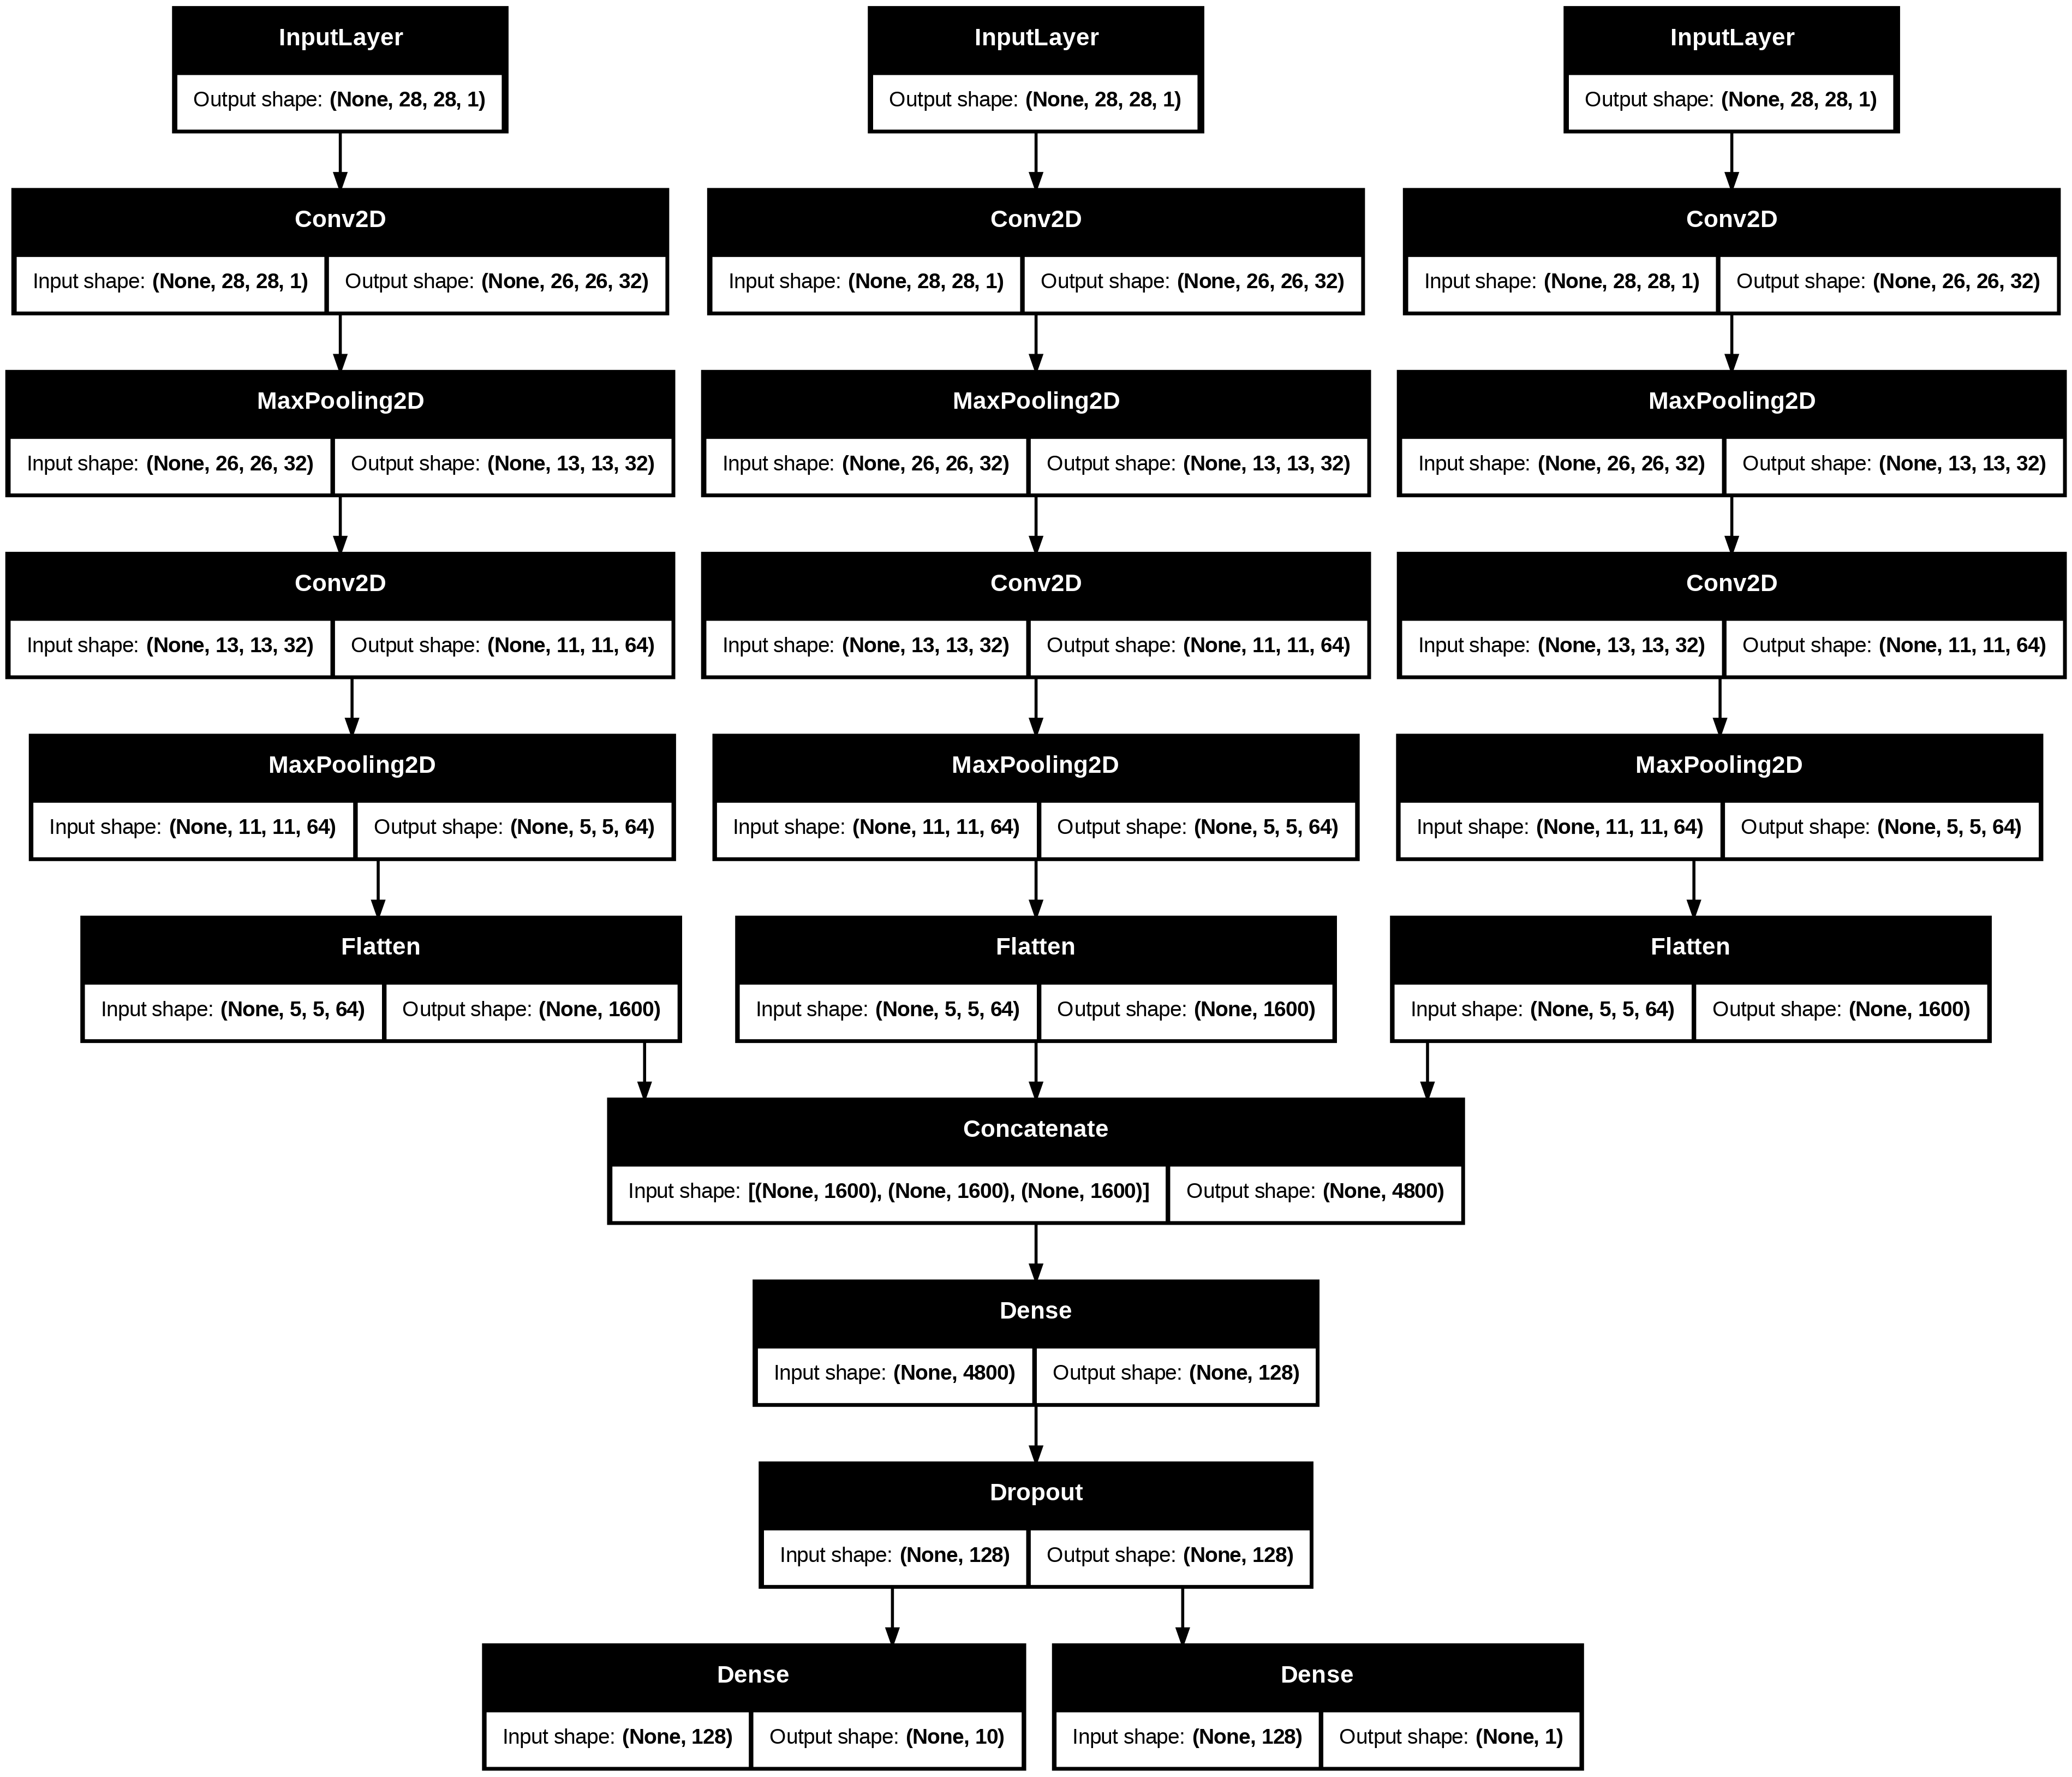

In [25]:
# Arquitectura funcional con capas convolucionales
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

tf.keras.backend.clear_session()

# Load and preprocess MNIST data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train, X_valid = X_train[:-55000], X_train[-55000:]
y_train, y_valid = y_train[:-55000], y_train[-55000:]

X_train = X_train[..., np.newaxis]/255.
X_valid = X_valid[..., np.newaxis]/255.
X_test = X_test[..., np.newaxis]/255.
print(X_train.shape,X_valid.shape,X_test.shape)

# Create inputs with and without noise
var_ = [0.01,0.25]
inputs_train = [X_train]
inputs_valid = [X_valid]
inputs_test = [X_test]

#recorrer varianzas
for var_i in var_:
    dim = X_train.shape
    #definir ruido
    tmp = X_train + (np.sqrt(var_i)*np.random.randn(X_train.shape[0],dim[1],dim[2],dim[3]))
    tmp = MinMaxScaler().fit_transform(tmp.reshape(dim[0],-1).T).T #fijar señal con ruido de 0 a 1
    inputs_train += [tmp.reshape(dim)]

    dim = X_valid.shape
    tmp = X_valid + (np.sqrt(var_i)*np.random.randn(X_valid.shape[0],dim[1],dim[2],dim[3]))
    tmp = MinMaxScaler().fit_transform(tmp.reshape(dim[0],-1).T).T
    inputs_valid += [tmp.reshape(dim)]

    dim = X_test.shape
    tmp = X_test + (np.sqrt(var_i)*np.random.randn(X_test.shape[0],dim[1],dim[2],dim[3]))
    tmp = MinMaxScaler().fit_transform(tmp.reshape(dim[0],-1).T).T
    inputs_test += [tmp.reshape(dim)]

# Define input layers for clean and noisy images
input_clean = tf.keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]), name='input_clean')
input_noise1 = tf.keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]), name='input_noise1')
input_noise2 = tf.keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]), name='input_noise2')

# Convolutional branch for clean images
conv1_clean = tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu')(input_clean)
maxpool1_clean = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1_clean)
conv2_clean = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu')(maxpool1_clean)
maxpool2_clean = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2_clean)
flatten_clean = tf.keras.layers.Flatten()(maxpool2_clean)

# Convolutional branch for noisy images with variance 0.01
conv1_noise1 = tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu')(input_noise1)
maxpool1_noise1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1_noise1)
conv2_noise1 = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu')(maxpool1_noise1)
maxpool2_noise1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2_noise1)
flatten_noise1 = tf.keras.layers.Flatten()(maxpool2_noise1)

# Convolutional branch for noisy images with variance 0.25
conv1_noise2 = tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu')(input_noise2)
maxpool1_noise2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1_noise2)
conv2_noise2 = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu')(maxpool1_noise2)
maxpool2_noise2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2_noise2)
flatten_noise2 = tf.keras.layers.Flatten()(maxpool2_noise2)


# Concatenate the flattened outputs from all branches
concat = tf.keras.layers.concatenate([flatten_clean, flatten_noise1, flatten_noise2])

# Dense layers for the combined features
dense1 = tf.keras.layers.Dense(128, activation='relu')(concat)
dropout = tf.keras.layers.Dropout(0.5)(dense1) # Added dropout for regularization

# Output layers
output_digit = tf.keras.layers.Dense(10, activation='softmax', name='output_digit')(dropout) # Output for digit estimation (0-9)
output_parity = tf.keras.layers.Dense(1, activation='sigmoid', name='output_parity')(dropout) # Output for parity estimation (even/odd)


# Create the functional model
model_cnn = tf.keras.Model(inputs=[input_clean, input_noise1, input_noise2], outputs=[output_digit, output_parity])

# Display the model summary and plot the model architecture
model_cnn.summary()
tf.keras.utils.plot_model(model_cnn, show_shapes=True)

#3. Codigo desglozado.
**Importación de librerías**

In [31]:
# ================================================================
# Importación de librerías y limpieza de sesión previa
# ================================================================
import tensorflow as tf
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D,
                                     BatchNormalization, Dropout,
                                     GlobalAveragePooling2D, Dense,
                                     concatenate)
from tensorflow.keras.models import Model

tf.keras.backend.clear_session()
print("✅ Librerías cargadas correctamente.")

✅ Librerías cargadas correctamente.


**Definición de entradas**

In [32]:
# ================================================================
# 1️⃣ Definir las tres entradas del modelo
# ================================================================
# Cada entrada corresponde a un tipo de imagen (28x28, canal único)

input_clean   = Input(shape=(28, 28, 1), name='img_limpia')                # Imágenes originales
input_noise_v1 = Input(shape=(28, 28, 1), name='img_ruido_varianza_baja')  # Ruido leve
input_noise_v2 = Input(shape=(28, 28, 1), name='img_ruido_varianza_alta')  # Ruido más fuerte

print("Entradas definidas correctamente:")
for inp in [input_clean, input_noise_v1, input_noise_v2]:
    print(f" - {inp.name} → {inp.shape}")


Entradas definidas correctamente:
 - img_limpia → (None, 28, 28, 1)
 - img_ruido_varianza_baja → (None, 28, 28, 1)
 - img_ruido_varianza_alta → (None, 28, 28, 1)


**Bloque convolucional compartido**

In [33]:
# ================================================================
# 2️⃣ Bloque convolucional compartido
# ================================================================
# Este bloque CNN extrae características de cada tipo de imagen.
# Se reutiliza el mismo conjunto de pesos (shared weights) en las tres ramas.
# Inspirado en el diseño básico del cuaderno "3_Introduccion_CNN.ipynb".

def bloque_conv_compartido(x):
    # Primera etapa de convolución + normalización + pooling
    x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.25)(x)

    # Segunda etapa: más filtros para capturar patrones complejos
    x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.25)(x)

    # Reducción global (reduce dimensiones espaciales a un vector)
    x = GlobalAveragePooling2D()(x)
    return x

print("✅ Bloque convolucional definido correctamente.")


✅ Bloque convolucional definido correctamente.


**Aplicación del bloque a cada entrada**

In [34]:
# ================================================================
# 3️⃣ Aplicar bloque convolucional a cada una de las tres entradas
# ================================================================
features_clean   = bloque_conv_compartido(input_clean)
features_noise_v1 = bloque_conv_compartido(input_noise_v1)
features_noise_v2 = bloque_conv_compartido(input_noise_v2)

# Mostrar forma de las características resultantes
print("✅ Características extraídas de cada entrada correctamente.")


✅ Características extraídas de cada entrada correctamente.


**Fusión de características**

In [35]:
# ================================================================
# 4️⃣ Concatenación de las tres ramas de características
# ================================================================
fusion = concatenate([features_clean, features_noise_v1, features_noise_v2],
                     name='fusion_caracteristicas')

# Capas densas para integrar la información combinada
fusion = Dense(128, activation='relu', name='fusion_dense_1')(fusion)
fusion = Dropout(0.3)(fusion)
fusion = Dense(64, activation='relu', name='fusion_dense_2')(fusion)

print("✅ Fusión de características completada.")


✅ Fusión de características completada.


**Definición de salidas**

In [36]:
# ================================================================
# 5️⃣ Definición de las salidas
# ================================================================

# Salida 1: Clasificación del dígito (0–9)
salida_digito = Dense(10, activation='softmax', name='salida_digito')(fusion)

# Salida 2: Clasificación par/impar
salida_paridad = Dense(1, activation='sigmoid', name='salida_paridad')(fusion)

print("✅ Salidas definidas correctamente.")


✅ Salidas definidas correctamente.


**Construcción del modelo funcional**

In [37]:
# ================================================================
# 6️⃣ Construcción del modelo funcional completo
# ================================================================
modelo_multi = Model(
    inputs=[input_clean, input_noise_v1, input_noise_v2],
    outputs=[salida_digito, salida_paridad],
    name='CNN_multiinput_multitask_MNIST'
)

print("✅ Modelo funcional creado correctamente.")


✅ Modelo funcional creado correctamente.


**Compilación del modelo**

In [38]:
# ================================================================
# 7️⃣ Compilar el modelo con dos funciones de pérdida
# ================================================================
modelo_multi.compile(
    optimizer='adam',
    loss={
        'salida_digito': 'sparse_categorical_crossentropy',
        'salida_paridad': 'binary_crossentropy'
    },
    metrics={
        'salida_digito': ['accuracy'],
        'salida_paridad': ['accuracy']
    },
    # Se da más peso a la tarea de clasificación del dígito
    loss_weights={'salida_digito': 1.0, 'salida_paridad': 0.3}
)

print("✅ Modelo compilado correctamente.")


✅ Modelo compilado correctamente.


**Resumen y visualización del modelo**

Model: "CNN_multiinput_multitask_MNIST"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ img_limpia          │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ img_ruido_varianza… │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ img_ruido_varianza… │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 28, 28,    │        320 │ img_limpia[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 28, 28,    │        320 │ img_ruido_varian… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 28, 28,    │        320 │ img_ruido_varian… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 28, 28,    │        128 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │        128 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │        128 │ conv2d_8[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 28, 28,    │      9,248 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 28, 28,    │      9,248 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 28, 28,    │      9,248 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 14, 14,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 14, 14,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 14, 14,    │          0 │ conv2d_9[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 14, 14,    │          0 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 14, 14,    │          0 │ max_pooling2d_2[

 Total params: 229,803 (897.67 KB)

 Trainable params: 229,227 (895.42 KB)

 Non-trainable params: 576 (2.25 KB)

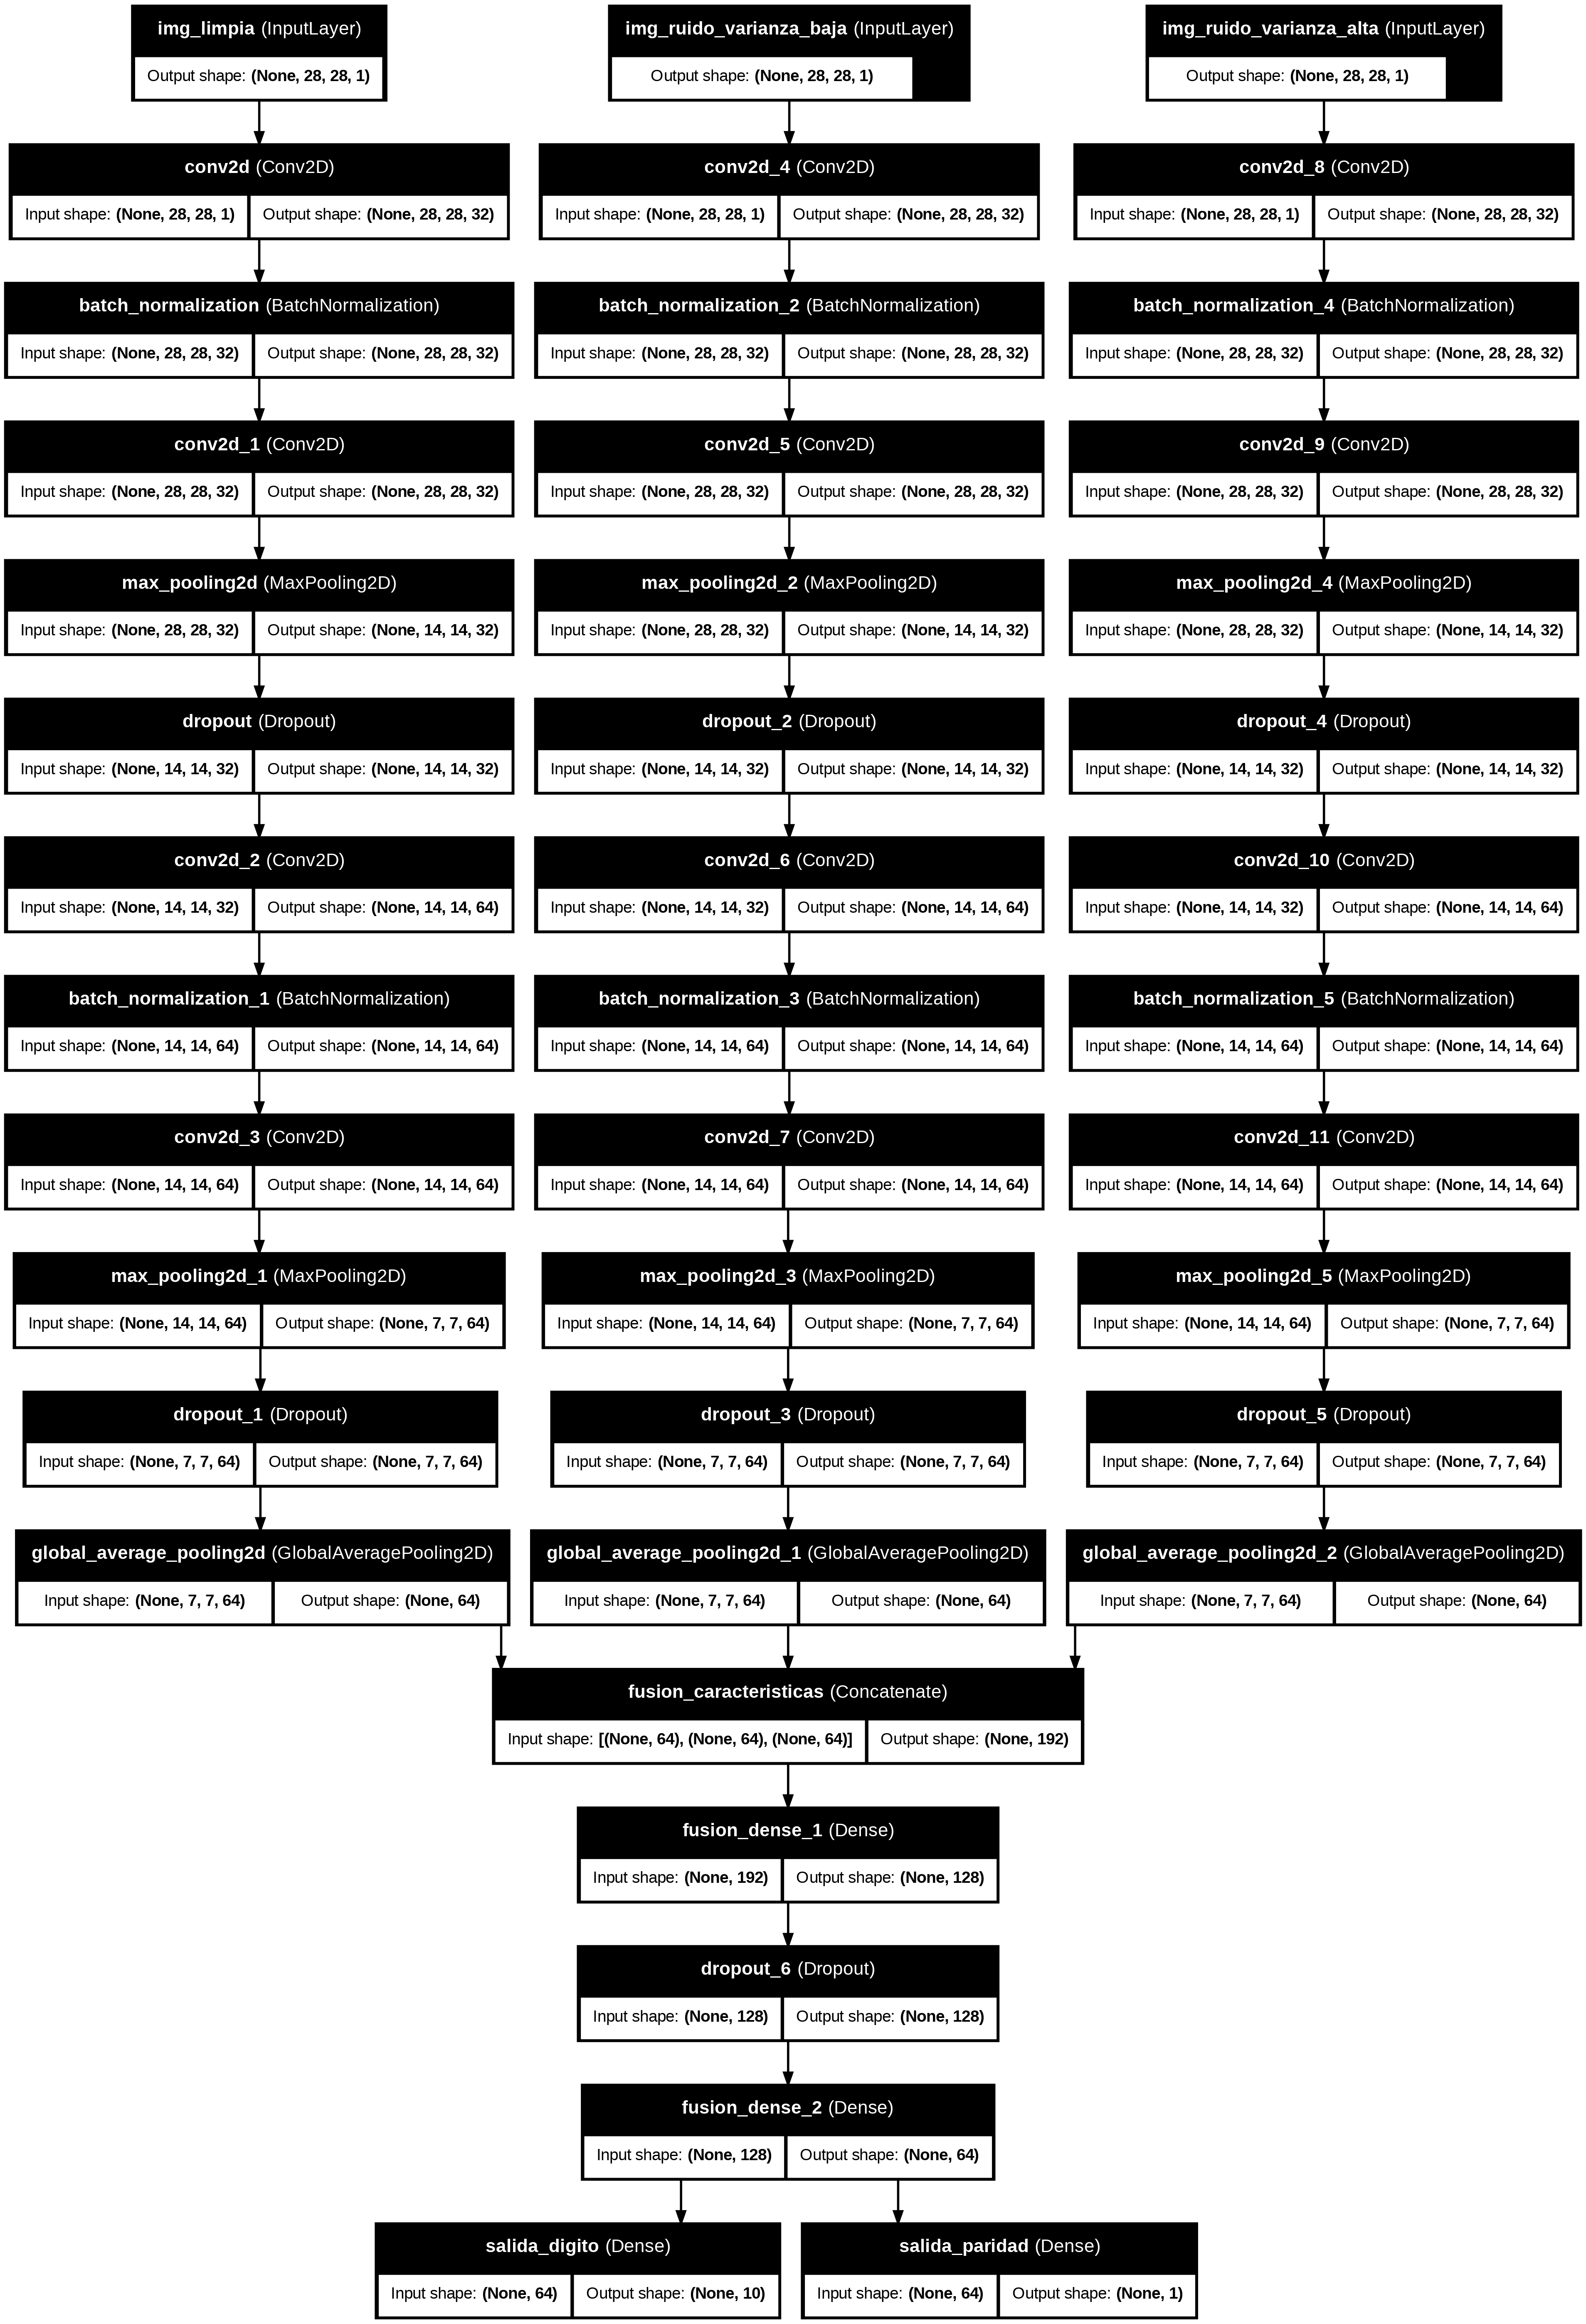

In [39]:
# ================================================================
# 8️⃣ Mostrar resumen y diagrama de la arquitectura
# ================================================================
modelo_multi.summary()

# Visualizar el flujo del modelo (guarda imagen .png)
tf.keras.utils.plot_model(modelo_multi, show_shapes=True,
                          show_dtype=False, show_layer_names=True,
                          to_file='modelo_funcional_CNN.png')
